In [3]:
import pandas as pd

dataset = ["roadNet-PA", "synthesized-1b", "twitter-2010"]
methods = ["edge", "vertex", "greedy", "hybrid"]

machines = [2,3,4, 8]

df = pd.DataFrame()
res = {}
for d in dataset:
    res[d] = {}
    for i, method in enumerate(methods):
        for m in machines: 
            file_name = f"output/{d}_{method}_{m}_machines.txt"
            lines = open(file_name).readlines()
            rep_factor = float(lines[-1].replace("Replication Factor: ", ""))
            res[d][method] = res[d].get(method, []) + [rep_factor]

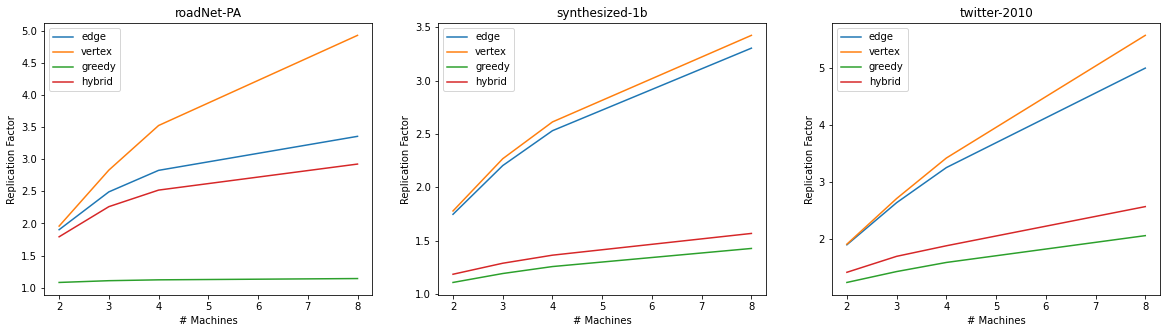

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,5))
for i, (d, r) in enumerate(res.items()):
    plt.subplot(1,len(dataset),i+1)
    for t in r:
        plt.plot(machines, r[t], label=t)
    plt.xlabel("# Machines")
    plt.ylabel("Replication Factor")
    plt.legend()
    plt.title(d)
plt.savefig("data.png")
plt.show()